In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from underthesea import word_tokenize, pos_tag
from collections import Counter
from wordcloud import WordCloud
import numpy as np

/home/20010741/.conda/envs/thanhdz/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('data/all_articles.csv')  # Replace with your data file

# Basic dataset information
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

Dataset Shape: (1589, 5)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      1589 non-null   object
 1   author    1589 non-null   object
 2   title     1589 non-null   object
 3   url       1589 non-null   object
 4   category  1589 non-null   object
dtypes: object(5)
memory usage: 62.2+ KB


In [3]:
# Text preprocessing function
def preprocess_text(text):
    # Word tokenization using underthesea
    tokens = word_tokenize(text)
    # Convert to lowercase
    tokens = [token.lower() for token in tokens]
    return tokens

# Add text statistics
def get_text_stats(text):
    tokens = preprocess_text(text)
    return {
        'word_count': len(tokens),
        'char_count': len(text),
        'avg_word_length': np.mean([len(word) for word in tokens])
    }

# Apply text statistics to your text column
text_stats = df['text'].apply(get_text_stats)  # Replace 'text_column' with your column name
stats_df = pd.DataFrame(text_stats.tolist())

In [4]:
# Word frequency analysis
def plot_top_words(texts, n=20):
    all_words = []
    for text in texts:
        tokens = preprocess_text(text)
        all_words.extend(tokens)
    
    word_freq = Counter(all_words)
    top_words = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:n])
    
    plt.figure(figsize=(12, 6))
    plt.bar(top_words.keys(), top_words.values())
    plt.xticks(rotation=45, ha='right')
    plt.title('Top Words Frequency')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Create word cloud
def create_wordcloud(texts):
    text = ' '.join([' '.join(preprocess_text(text)) for text in texts])
    wordcloud = WordCloud(width=800, height=400,
                         background_color='white',
                         font_path='/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf'  # For Vietnamese text
                         ).generate(text)
    
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Text Data')
    plt.show()

In [5]:
# POS tag analysis
def analyze_pos_tags(texts):
    all_pos = []
    for text in texts:
        pos_tags = pos_tag(text)
        all_pos.extend([tag[1] for tag in pos_tags])
    
    pos_freq = Counter(all_pos)
    
    plt.figure(figsize=(12, 6))
    plt.bar(pos_freq.keys(), pos_freq.values())
    plt.xticks(rotation=45, ha='right')
    plt.title('POS Tags Distribution')
    plt.xlabel('POS Tags')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

Running text analysis...


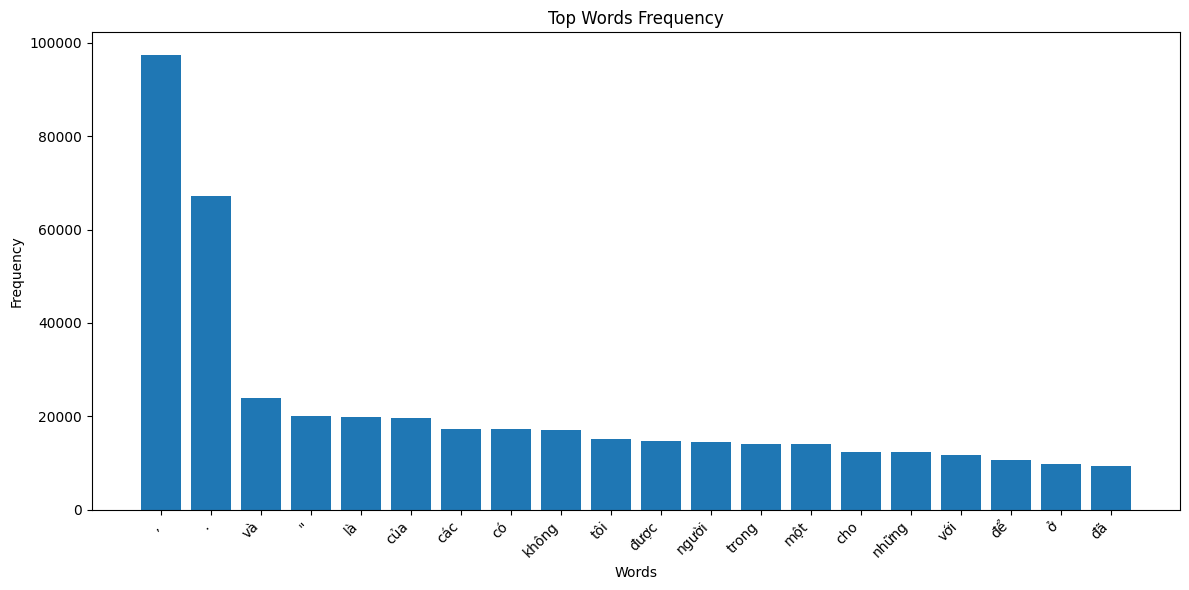

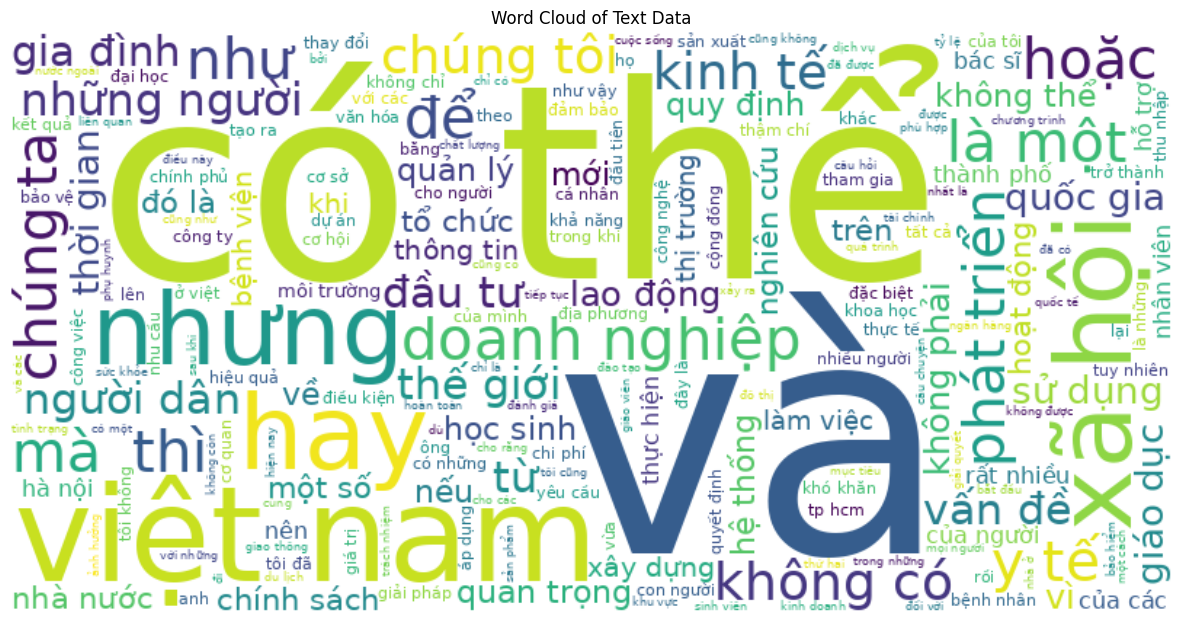

In [ ]:
# Run all analyses
text_column = 'text'

print("Running text analysis...")
plot_top_words(df[text_column])
create_wordcloud(df[text_column])
analyze_pos_tags(df[text_column])

# Display basic statistics
print("\nText Statistics Summary:")
print(stats_df.describe())

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import unicodedata
from underthesea import word_tokenize  
import string

df = pd.read_csv('data/all_articles.csv')
vietnamese_stopwords = open('vietnamese-stopwords.txt', 'r').read().split('\n')

# Hàm tiền xử lý văn bản tiếng Việt
def preprocess_vietnamese_text(text):
    # Chuyển về chữ thường
    text = text.lower()
    
    # Xóa số
    text = re.sub(r'\d+', '', text)

    # Xóa dấu câu
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Xóa dấu tiếng Việt
    text = unicodedata.normalize('NFC', text).replace('đ', 'd')

    # Xóa khoảng trắng thừa
    text = text.strip()

    # Tách từ
    tokens = word_tokenize(text, format='text')

    
    return text

# Áp dụng tiền xử lý cho cột văn bản (thay 'text_column' bằng tên cột của bạn)
df['processed_text'] = df['text'].apply(preprocess_vietnamese_text)


# Lưu dữ liệu đã xử lý
df.to_csv('data/processed_data.csv', index=False)

In [16]:
#Thêm 1 cột có loại bỏ stopwords
def remove_stopwords(text):
    tokens = text.split()
    tokens = [token for token in tokens if token not in vietnamese_stopwords]
    return ' '.join(tokens)

df['text_no_stopwords'] = df['processed_text'].apply(remove_stopwords)
df.to_csv('data/processed_data.csv', index=False)

Top 10 tác giả có nhiều bài viết nhất:
--------------------------------------------------
Võ Nhật Vinh: 72 bài viết
Quan Thế Dân: 59 bài viết
Trần Văn Phúc: 44 bài viết
Lưu Đình Long: 38 bài viết
Đặng Hùng Võ: 36 bài viết
Nguyễn Lân Hiếu: 31 bài viết
Lang Minh: 30 bài viết
Trình Phương Quân: 29 bài viết
Jesse Peterson: 29 bài viết
Tô Thức: 25 bài viết


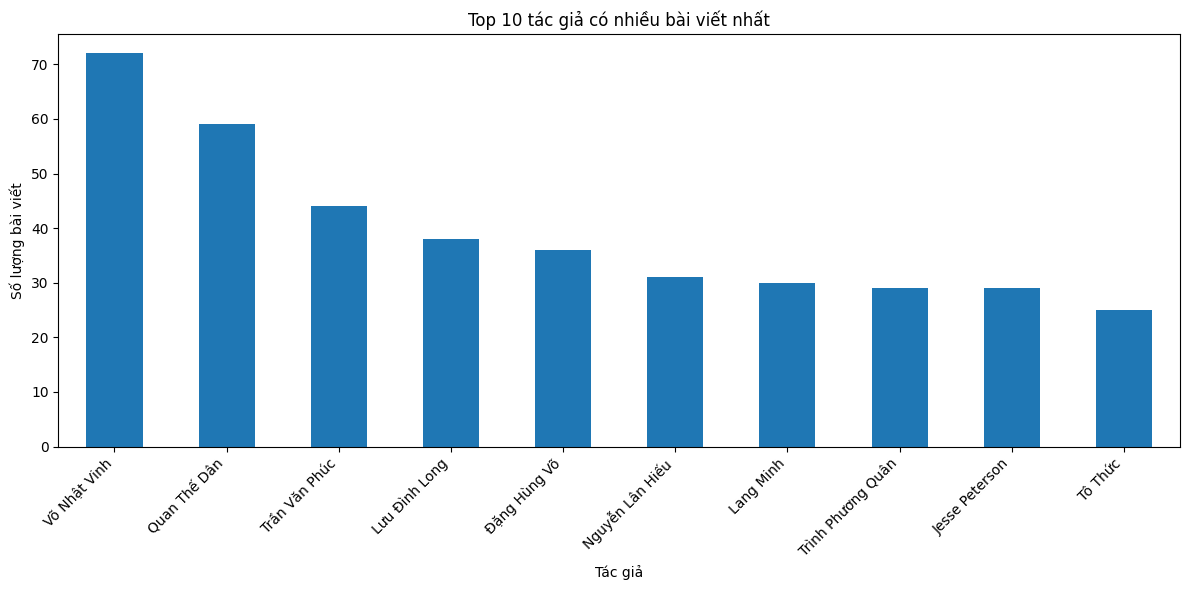

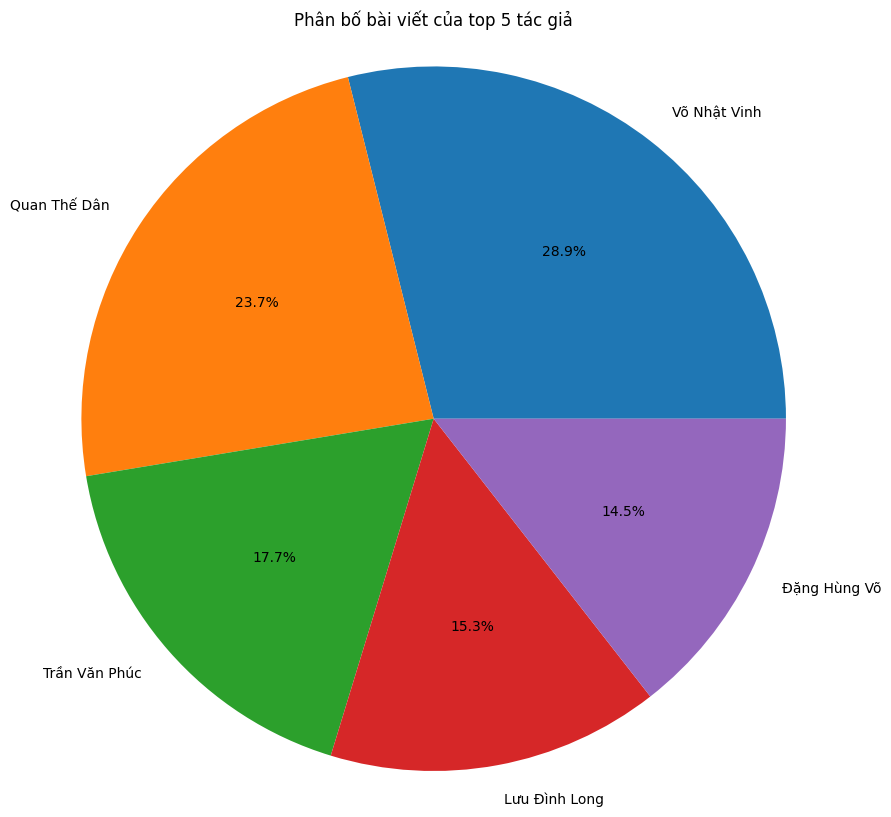


Thống kê về số lượng bài viết của tác giả:
--------------------------------------------------
Tổng số tác giả: 322
Trung bình số bài viết/tác giả: 4.93
Số bài viết nhiều nhất: 72
Số bài viết ít nhất: 1
Độ lệch chuẩn: 8.04


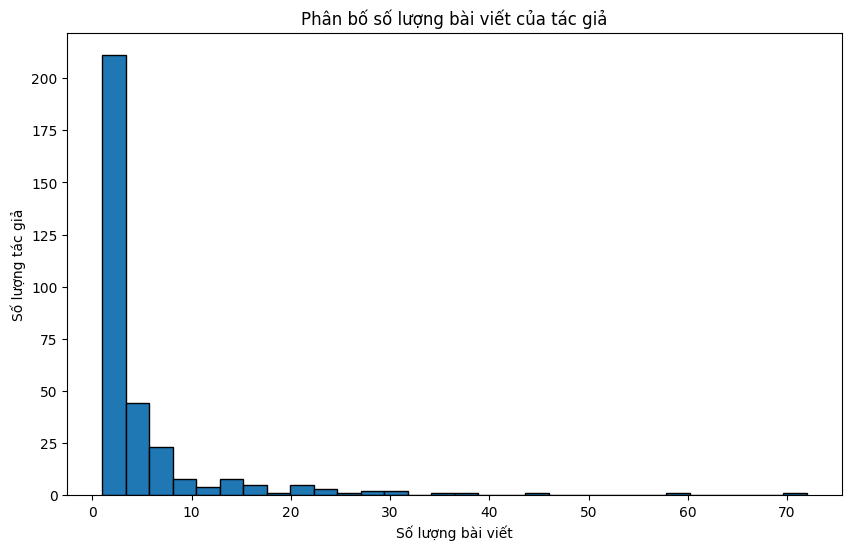

In [ ]:
# Phân tích số lượng bài báo theo tác giả
author_stats = df['author'].value_counts()

# In ra top 10 tác giả có nhiều bài viết nhất
print("Top 10 tác giả có nhiều bài viết nhất:")
print("-" * 50)
for author, count in author_stats.head(10).items():
    print(f"{author}: {count} bài viết")

# Vẽ biểu đồ phân bố số lượng bài viết
plt.figure(figsize=(12, 6))
author_stats.head(10).plot(kind='bar')
plt.title('Top 10 authors with the most articles')
plt.xlabel('Authors')
plt.ylabel('Number of articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Vẽ biểu đồ pie chart cho top 5 tác giả
plt.figure(figsize=(10, 10))
plt.pie(author_stats.head(5), labels=author_stats.head(5).index, autopct='%1.1f%%')
plt.title('Phân bố bài viết của top 5 tác giả')
plt.axis('equal')
plt.show()

# Thống kê cơ bản
print("\nThống kê về số lượng bài viết của tác giả:")
print("-" * 50)
print(f"Tổng số tác giả: {len(author_stats)}")
print(f"Trung bình số bài viết/tác giả: {author_stats.mean():.2f}")
print(f"Số bài viết nhiều nhất: {author_stats.max()}")
print(f"Số bài viết ít nhất: {author_stats.min()}")
print(f"Độ lệch chuẩn: {author_stats.std():.2f}")

# Tạo histogram để xem phân bố số lượng bài viết
plt.figure(figsize=(10, 6))
plt.hist(author_stats.values, bins=30, edgecolor='black')
plt.title('Phân bố số lượng bài viết của tác giả')
plt.xlabel('Số lượng bài viết')
plt.ylabel('Số lượng tác giả')
plt.show()